In [51]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [52]:
iris = load_iris()

In [53]:
df=pd.DataFrame(iris.data , columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


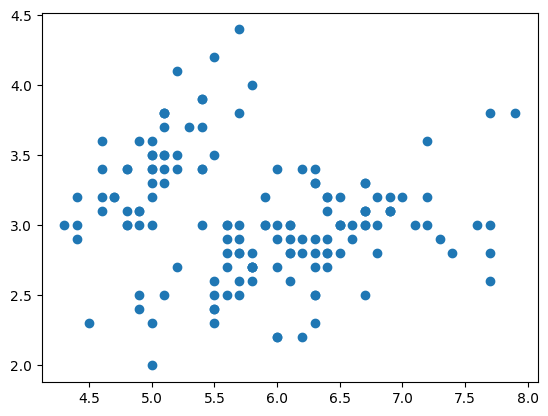

In [54]:
plt.scatter(df['sepal length (cm)'] ,df['sepal width (cm)']  )

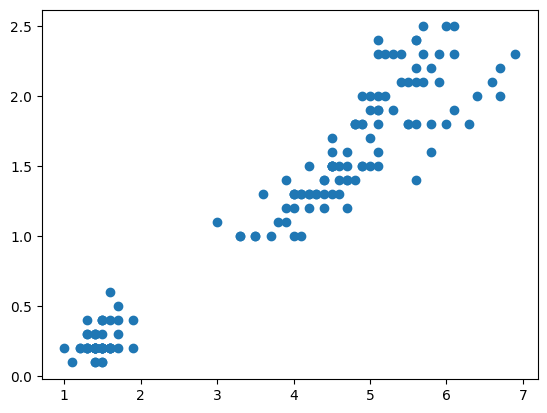

In [55]:
plt.scatter(df['petal length (cm)'] ,df['petal width (cm)']  )

In [56]:
X =df.iloc[:, [0, 1, 2, 3]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set t

<function matplotlib.pyplot.show(close=None, block=None)>

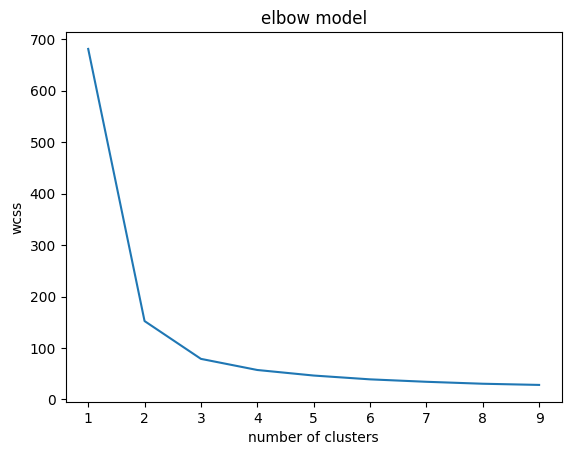

In [57]:
wcss = []
for i in range(1,10) :
  KMeansModel = KMeans(n_clusters=i,init='k-means++', random_state=33,algorithm= 'auto')
  KMeansModel.fit(X)
  wcss.append(KMeansModel.inertia_)


plt.plot (range(1,10) , wcss)
plt.title("elbow model")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show

from this we choose number of clusters as 3

In [58]:
KMeansModel2 = KMeans(n_clusters=3,init='k-means++', random_state=33,algorithm= 'auto')
clusters = KMeansModel2.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [59]:
X.shape


(150, 4)

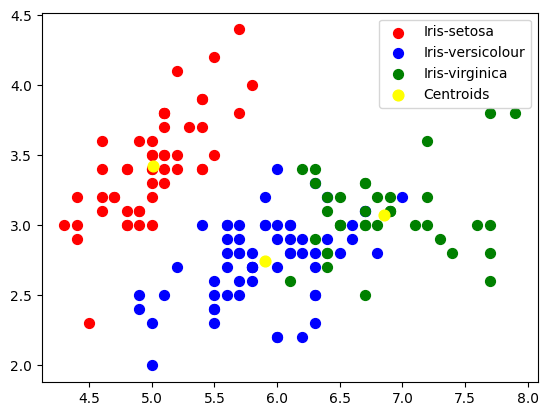

In [62]:
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=50, c='blue', label='Iris-versicolour')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=50, c='green', label='Iris-virginica')
plt.scatter(KMeansModel2.cluster_centers_[:, 0], KMeansModel2.cluster_centers_[:,1],
            s = 60, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()